In [ ]:
#libraries requires:pandas geopandas descartes geoplot

In [3]:
pip install pandas geopandas descartes geoplot shapely

     |████████████████████████████████| 1.0MB 5.6MB/s 
     |████████████████████████████████| 6.5MB 11.5MB/s 
     |████████████████████████████████| 14.8MB 294kB/s 
     |████████████████████████████████| 14.4MB 317kB/s 
     |████████████████████████████████| 225kB 37.2MB/s 
     |████████████████████████████████| 19.1MB 1.2MB/s 
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-linux_x86_64.whl size=15127716 sha256=c1c86dd96305ecceb84346aec59fd760d356ccb10532c7e5a69cca47698a3d8f
  Stored in directory: /root/.cache/pip/wheels/8d/f8/da/2c05136f2162370d2baec85bfbbf91d7729ab9e248da878acd
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=b7372374ebbaa18833d17b67cad8c0a916249a8ed4bea05a245da702c12b29aa
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built cartopy pyshp


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster


In [15]:
seattle_coord = (47.7511, 120.7401)

df = pd.DataFrame(
    {'City': "seattle",
     'Latitude': [seattle_coord[0]],
     'Longitude': [seattle_coord[1]]
                   })
df.head()

,City,Latitude,Longitude
0,seattle,47.7511,120.7401


In [16]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(-df.Longitude, df.Latitude), crs = 4326)

In [13]:
usa = gpd.read_file("states/states.shp")

In [ ]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


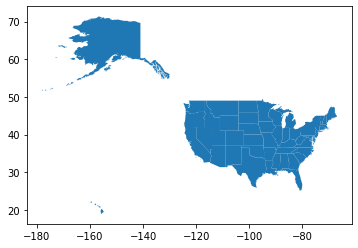

In [17]:
usa.plot()

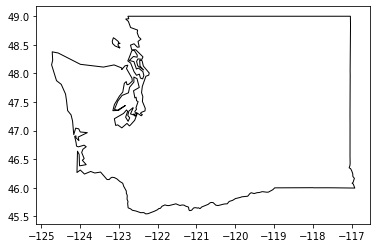

In [18]:
usa[usa.STATE_NAME == "Washington"].plot(color='white', edgecolor="black")

In [5]:
housing_columns = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated' ,'zipcode', 'lat', 'long' ]
housing_data = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/housing.csv', usecols=housing_columns)
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900,3,1.00,1180,5650,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000,3,2.25,2570,7242,2.0,0,3,7,400,1951,1991,98125,47.7210,-122.319
2,180000,2,1.00,770,10000,1.0,0,3,6,0,1933,0,98028,47.7379,-122.233
3,604000,4,3.00,1960,5000,1.0,0,5,7,910,1965,0,98136,47.5208,-122.393
4,510000,3,2.00,1680,8080,1.0,0,3,8,0,1987,0,98074,47.6168,-122.045


In [6]:
property_columns = [ 'BuildingTypeName', 'PropertyTypeEPA', 'City', 'Zip', 'Neighborhood', 'Latitude', 'Longitude' ]
property_data = pd.read_csv('https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/property_types.csv', usecols=property_columns)
property_data.head()

,BuildingTypeName,PropertyTypeEPA,City,Zip,Neighborhood,Latitude,Longitude
0,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.612190,-122.337997
1,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.613106,-122.333358
2,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.613349,-122.337699
3,NonResidential,Hotel,SEATTLE,98101,DOWNTOWN,47.614216,-122.336609
4,NonResidential,Hotel,SEATTLE,98121,DOWNTOWN,47.613754,-122.340924


In [7]:
zip_property_data = property_data.Zip.unique()
zip_housing_data = housing_data.zipcode.unique()
zip_comon = list(set(zip_property_data).intersection(zip_housing_data))
print(zip_comon)

[98177, 98178, 98199, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98155]


In [8]:
property_data = property_data[property_data.BuildingTypeName.map(lambda e: e in ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus'])]
property_data = property_data[property_data.City.map(lambda e: e == 'SEATTLE')]
property_data = property_data[property_data.Zip.map(lambda e: e in zip_comon)]
property_data = property_data[property_data.PropertyTypeEPA.map(lambda e: e != 'Hotel')]

property_data = property_data.drop(['BuildingTypeName', 'City'], axis=1)
property_data = property_data.rename(columns={'PropertyTypeEPA': 'property_type', 'Zip': 'zip', 'Neighborhood':'neighborhood', 'Latitude': 'latitude', 'Longitude':'longitude'})

property_data.dropna(inplace=True)
property_data.reset_index(drop=True)

property_data.head()

housing_data.to_csv(r"housing_data_cleaned.csv", index = False, header=True)

In [9]:
housing_data.sqft_living = housing_data.sqft_living.apply(lambda e: round(e * 0.092))
housing_data.sqft_lot = housing_data.sqft_lot.apply(lambda e: round(e * 0.092))
housing_data.sqft_basement = housing_data.sqft_basement.apply(lambda e: round(e * 0.092))

housing_data = housing_data[housing_data.zipcode.map(lambda e: e in zip_comon)]

housing_data = housing_data.rename(columns={'sqft_living': 'm2_living', 'sqft_lot':'m2_lot', 'sqft_basement':'m2_basement', 'zipcode':'zip'})

housing_data.dropna(inplace=True)
housing_data.reset_index(drop=True)

housing_data.head()



,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,condition,grade,m2_basement,yr_built,yr_renovated,zip,lat,long
0,221900,3,1.00,109,520,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000,3,2.25,236,666,2.0,0,3,7,37,1951,1991,98125,47.7210,-122.319
3,604000,4,3.00,180,460,1.0,0,5,7,84,1965,0,98136,47.5208,-122.393
8,229500,3,1.00,164,687,1.0,0,3,7,67,1960,0,98146,47.5123,-122.337
11,468000,2,1.00,107,552,1.0,0,4,7,28,1942,0,98115,47.6900,-122.292


In [97]:
houses = pd.read_csv("https://raw.githubusercontent.com/jafetimbre/mib-fiesta/master/data/housing_data_cleaned.csv")
houses

,date,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,condition,grade,m2_basement,yr_built,yr_renovated,zip,lat,long
0,20141013T000000,221900,3,1.00,109,520,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000,3,2.25,236,666,2.0,0,3,7,37,1951,1991,98125,47.7210,-122.319
2,20141209T000000,604000,4,3.00,180,460,1.0,0,5,7,84,1965,0,98136,47.5208,-122.393
3,20150415T000000,229500,3,1.00,164,687,1.0,0,3,7,67,1960,0,98146,47.5123,-122.337
4,20140527T000000,468000,2,1.00,107,552,1.0,0,4,7,28,1942,0,98115,47.6900,-122.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,20150219T000000,475000,3,2.50,121,119,2.0,0,3,8,12,2008,0,98116,47.5773,-122.409
7977,20140521T000000,360000,3,2.50,141,104,3.0,0,3,8,0,2009,0,98103,47.6993,-122.346
7978,20150223T000000,400000,4,2.50,213,535,2.0,0,3,8,0,2014,0,98146,47.5107,-122.362
7979,20140623T000000,402101,2,0.75,94,124,2.0,0,3,7,0,2009,0,98144,47.5944,-122.299


numar randuri: 7981


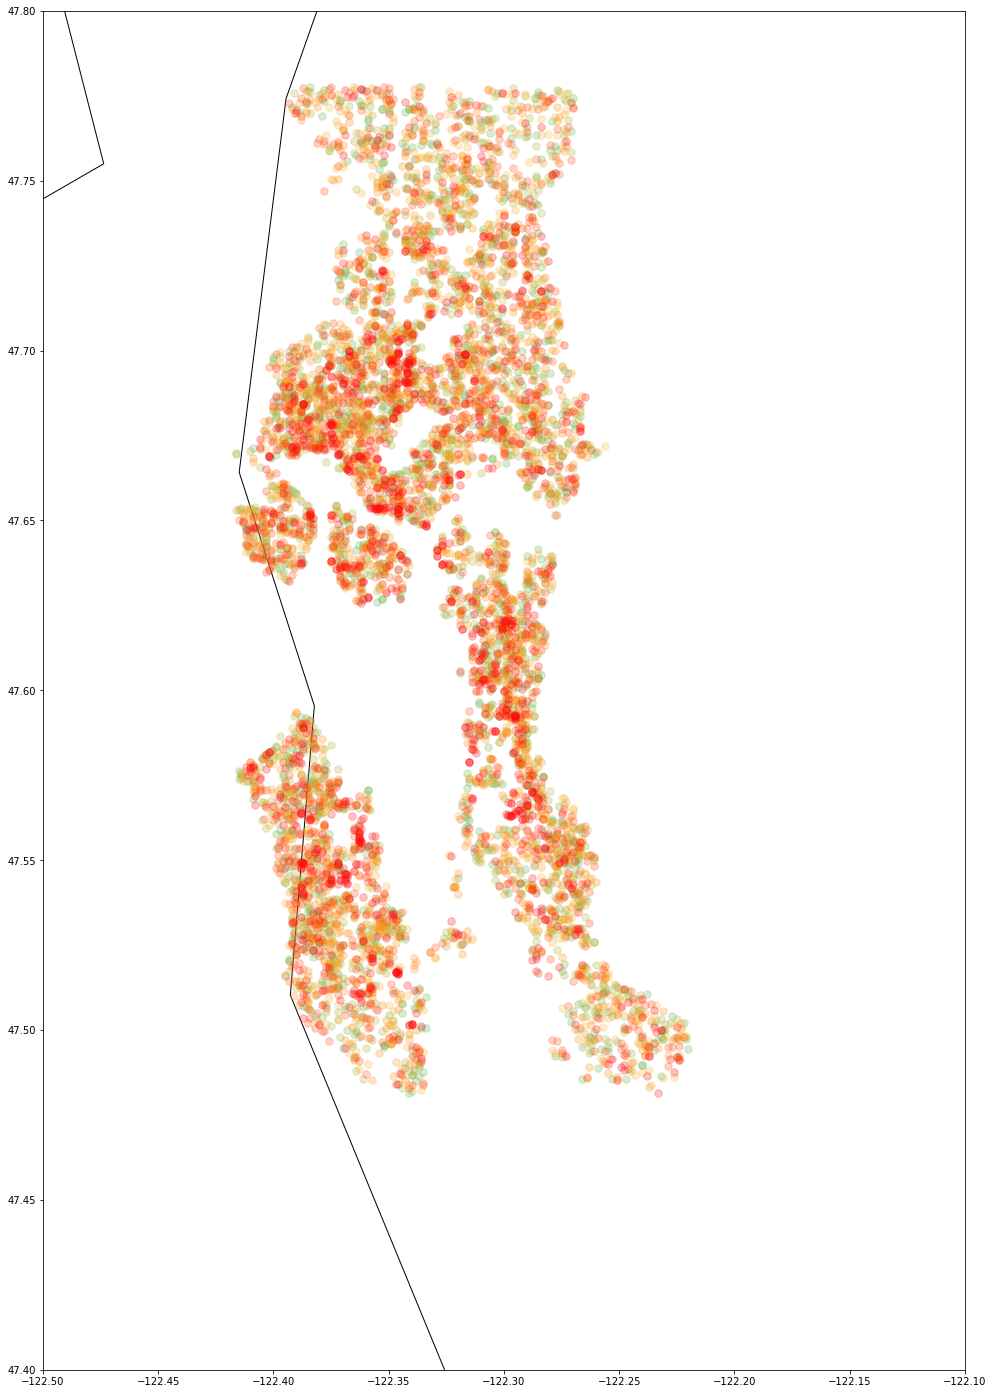

In [122]:
ax = usa[usa.STATE_NAME == "Washington"].plot(color='white', edgecolor="black", figsize=(25,25))
#ax.margins(x=-0.2, y=-0.45)
ax.set_xlim(-122.5, -122.1)
ax.set_ylim(47.4, 47.8)
gradient_arr = ['#69B34C', '#ACB334', '#FAB334', '#FF8E15', '#FF4E11', '#FF0D0D']
houses.sort_values(by=['price'])
row_numbers = len(houses['price'])
print("numar randuri:", row_numbers)
separator = row_numbers / 6

for i, row in houses.iterrows():
  plt.plot(row['long'], row['lat'], marker=".", color=gradient_arr[int(i/separator)], markersize=15, alpha=0.25)
#plt.legend(['green', 'light green', 'light yellow', 'yellow', 'orange', 'red'], ['cheapest', 'cheaper', 'below average', 'above average', 'expensive', 'the most expensive']);
plt.show()


In [ ]:
seattle_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=16,
                        tiles='openstreetmap')
for i, row in houses.head(1000).iterrows(): 
  lat = row['lat']
  print(lat)
  long = row['long']
  marker = folium.Marker([lat, long]).add_to(seattle_map)
seattle_map

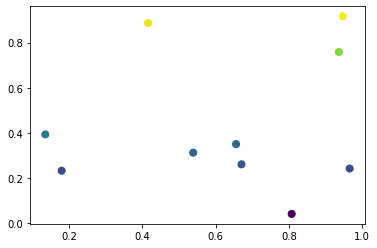

In [76]:
x = np.random.random(10)
y = np.random.random(10)
gradient_arr = ['#69B34C', '#ACB334', 'FAB334', 'FF8E15', 'FF4E11', 'FF0D0D']
plt.scatter(x, y, c=y, s=50)
plt.show()